In [68]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [69]:
series = pd.read_excel("Airlines+Data.xlsx",sheet_name='Sheet1')
series =pd.DataFrame(series);
series

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


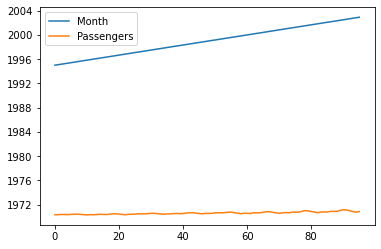

In [70]:
from pandas import read_csv
from matplotlib import pyplot
series.plot()
pyplot.show()

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

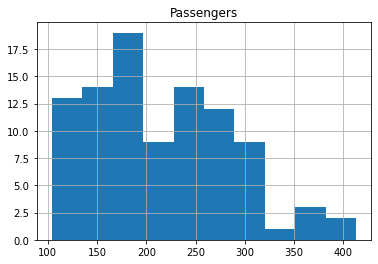

In [71]:
series.hist()

In [72]:
# separate out a validation dataset
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 86, Validation 10


In [74]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=1, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]


In [75]:
train

array([[  0., 112.],
       [  1., 118.],
       [  2., 132.],
       [  3., 129.],
       [  4., 121.],
       [  5., 135.],
       [  6., 148.],
       [  7., 148.],
       [  8., 136.],
       [  9., 119.],
       [ 10., 104.],
       [ 11., 118.],
       [ 12., 115.],
       [ 13., 126.],
       [ 14., 141.],
       [ 15., 135.],
       [ 16., 125.],
       [ 17., 149.],
       [ 18., 170.],
       [ 19., 170.],
       [ 20., 158.],
       [ 21., 133.],
       [ 22., 114.],
       [ 23., 140.],
       [ 24., 145.],
       [ 25., 150.],
       [ 26., 178.],
       [ 27., 163.],
       [ 28., 172.],
       [ 29., 178.],
       [ 30., 199.],
       [ 31., 199.],
       [ 32., 184.],
       [ 33., 162.],
       [ 34., 146.],
       [ 35., 166.],
       [ 36., 171.],
       [ 37., 180.],
       [ 38., 193.],
       [ 39., 181.],
       [ 40., 183.],
       [ 41., 218.],
       [ 42., 230.]], dtype=float32)

In [77]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    #print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 18.185


In [78]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [79]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [80]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
#p_values = range(0, 5)
#d_values = range(0, 5)
#q_values = range(0, 5)
warnings.filterwarnings("ignore")
#evaluate_models(train.values, p_values, d_values, q_values)

In [81]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [83]:
# load data
train = read_csv('dataset.csv', header=0, index_col=1, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

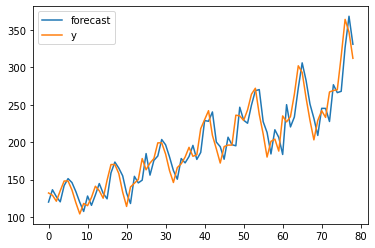

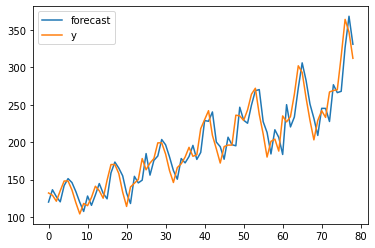

In [85]:
# fit model
model = ARIMA(X[:,1:], order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

In [87]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[2], forecast))
rmse

71.93703185584165

In [88]:
# fit model
data = pd.read_excel("Airlines+Data.xlsx",sheet_name='Sheet1')
data =pd.DataFrame(series);
# prepare data
X = train.values
X = X.astype('float32')

In [ ]:
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()